**Growing Neural Gas**


Евгений Борисов <esborisov@sevsu.ru>

---

Thomas Martinetz, Klaus Schulten A "neural gas" network learns topologies., Artificial Neural Networks. Elsevier. 1991, pp. 397–402.   
http://www.ks.uiuc.edu/Publications/Papers/PDF/MART91B/MART91B.pdf

Bernd Fritzke  A Growing Neural Gas Network Learns Topologies.    
https://proceedings.neurips.cc/paper/1994/file/d56b9fc4b0f1be8871f5e1c40c0067e7-Paper.pdf


Нестандартная кластеризация 5: Growing Neural Gas.
https://habr.com/ru/post/340360/
    
    
Расширяющийся нейронный газ.
https://habr.com/ru/post/544094/    

https://github.com/Siarshai/MicroGrowingNeuralGas

https://demogng.de/js/demogng.html?model=NG&showAutoRestart

---

In [1]:
import numpy as np
from numpy import random as rng 
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons

n_samples = 500
X, _ = make_moons(n_samples=n_samples, noise=.09)
X.shape

(500, 2)

In [5]:
# from sklearn.preprocessing import StandardScaler

# X_train = StandardScaler().fit_transform(X)
X_train = X.copy()
del X

X_train.shape

(500, 2)

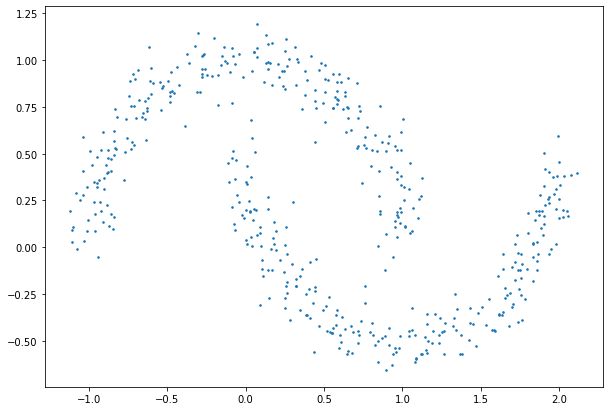

In [6]:
plt.figure(figsize=(10,7))
plt.scatter( x=X_train[:,0], y=X_train[:,1], s=10, marker='.' )

---

In [18]:
from sklearn.metrics.pairwise import euclidean_distances

n_samples, n_features = X_train.shape

# инициализируем вершины графа (матрицу весов сети)
v = rng.normal( size=(2,n_features), scale=.1 )

error = np.zeros(2,) # погрешность вершин относительно данных

edge = np.zeros(shape=(2,2)) # матрица смежности/ "возраст" рёбер
edge[0,1] = 1 
edge[1,0] = 1 

# список рёбер графа (пары номеров вершин)
# edge = [ set([0,1]), ]
# age = np.zeros(1,dtype=int) # "возраст" рёбер

In [19]:
# выбираем точку
i = rng.permutation(n_samples)[0]
x = X_train[i][np.newaxis,:]

In [20]:
# матрица расстояний от точки до всех вершин
d = euclidean_distances(x,v).flatten() 

# найти две вершины, ближайших к x
winner,second = np.argsort(d)[:2]

Накопить в массиве ошибок расстояние от ноды до сгенерированного образца данных:

$error_s \leftarrow error_s + \left\|\vec{w_s} - \vec{x}\right\|$

In [21]:
error[winner] = error[winner]+d[winner]

In [27]:
# список вершин соединённых с winner
neighbor = np.where(edge[winner]>0)[0]

Обновить местоположение s 


$\vec{w_s} \leftarrow \vec{w_s} + \eta_{winner}(\vec{x} - \vec{w_s})$

и всех нейронов, соединённых с ним рёбрами. 

$\vec{w_n} \leftarrow \vec{w_n} + \eta_{neighbour}(\vec{x} - \vec{w_n}), \forall w_n$

используются разные скорости обучения



In [29]:
lr_winner = .9
lr_neighbor = .4

In [30]:
lr = np.zeros(shape=(len(v),1))
lr[winner] = lr_winner
lr[neighbor] = lr_neighbor

In [31]:
v += lr*(x-v)

Увеличить возраст всех дуг, исходящих из нейрона winner

In [ ]:

# winner_edges = [ i for i,e in enumerate(edge) if winner in e  ]
# age[winner_edges]+=1

Если $winner$ и $second$ уже соединены дугой,   
то обнулить возраст этой дуги,   
иначе создать дугу с возрастом 0 между ними

In [ ]:
# e_winner = set([winner,second])
# if e_winner in edge:
#     age[edge.index(e_winner)]=0
# else:
#     edge.append(e_winner)
#     age.append(0)

удалить все ноды, из которых не исходит ни одной дуги

In [ ]:
# set.union(*edge)

---

In [16]:
# fig = plt.figure()
# plt.scatter(*data.T, alpha=0.02)
# plt.xticks([], [])
# plt.yticks([], [])

# def animate(i):
#     for line in animate.prev_lines:
#         line.remove()
        
#     # Training will slow down overtime and we increase number
#     # of data samples for training
#     n = int(0.5 * gng.n_iter_before_neuron_added * (1 + i // 100))
    
#     sampled_data_ids = np.random.choice(len(data), n)
#     sampled_data = data[sampled_data_ids, :]
#     gng.train(sampled_data, epochs=1)
    
#     lines = []
#     for node_1, node_2 in gng.graph.edges:
#         weights = np.concatenate([node_1.weight, node_2.weight])
#         line, = plt.plot(*weights.T, color='black')

#         plt.setp(line, linewidth=1, color='black')
        
#         lines.append(line)
#         lines.append(plt.scatter(*weights.T, color='black', s=10))
    
#     animate.prev_lines = lines
#     return lines

# animate.prev_lines = []
# anim = animation.FuncAnimation(fig, animate, tqdm(np.arange(220)), interval=30, blit=True)
# HTML(anim.to_html5_video())